## Load data.

In [1]:
import numpy as np
import os
import csv
import pickle
import matplotlib as mpl

from helper_functions import stats, pval_star, plot_overview_2_subplots_no_fit, SENT2LAB, SENT2IDX

CWD = os.path.abspath("")  # Jupyter notebook path.
dir_dict = os.path.join(CWD, "dicts")  # Data to plot.
dir_output = os.path.join(CWD, "output")  # Folder to put figures in.
dir_npy = os.path.join(CWD, "npy")  # Data files needed for plotting figures.

# Set up plotting parameters.
font_kw = {"family": "arial", "weight": "normal", "size": "7"}  # Markers and such.
mpl.rc("font", **font_kw)

# Load data to plot.
USE_CAPS = True  # Capitalize genders.
BY = "Gender"  # Used in figure file names.

ratio_mat_rel = np.load(os.path.join(dir_npy, "ratio_mat_rel-gender_effect.npy"))
genders_select = np.load(os.path.join(dir_npy, "groups-gender_effect.npy"))

## Make figures.

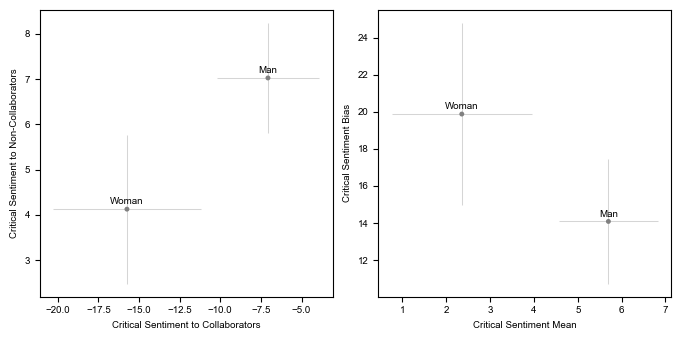

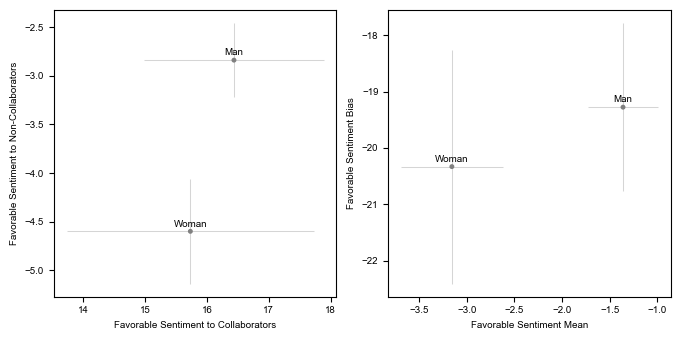

In [2]:
alpha_err = 0.33

ylims = [[-45, 60], [-25, 85]]
ylims = None
plot_overview_2_subplots_no_fit(
    ratio_mat_rel, genders_select, genders_select, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

ylims = [[-45, 60], [-25, 85]]
ylims = None
plot_overview_2_subplots_no_fit(
    ratio_mat_rel, genders_select, genders_select, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

## Normality tests; p-val significant means it's NOT Gaussian.


Data is mostly normal; since we have good sample size (1000 for each group), t-test should suffice even for a bit of non-normality

also, men and women don't have the same variance, so we have to use Welch’s t-test, which does not assume equal population variance\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [3]:
def statistical_tests(rmrs, grps, sent=-1):
    print(f"===================={SENT2LAB[sent]}====================")
    # Sentiment across collab & non-collab.
    mean = rmrs[0, :, SENT2IDX[sent], :]
    # Sentiment different between collab & non-collab.
    bias = rmrs[2, :, SENT2IDX[sent], :] - rmrs[1, :, SENT2IDX[sent], :]

    t_mean = stats.ttest_ind(mean[0, :], mean[1, :], equal_var=False, permutations=None, alternative="two-sided")
    t_bias = stats.ttest_ind(bias[0, :], bias[1, :], equal_var=False, permutations=None, alternative="two-sided")
    print(
        f"mean {np.nanmean(mean[0, :])-np.nanmean(mean[1, :]):.2f} t={t_mean.statistic:.2f} {pval_star(t_mean.pvalue)} df={t_mean.df:.0f}"
    )
    print(
        f"bias {np.nanmean(bias[0, :])-np.nanmean(bias[1, :]):.2f} t={t_bias.statistic:.2f} {pval_star(t_bias.pvalue)} df={t_bias.df:.0f}"
    )

    # Normality tests.
    print("Normality tests:")
    for g, g_str in enumerate(grps):
        print(f"mean {g_str} {pval_star(stats.normaltest(mean[g, :]).pvalue)}")
        print(f"bias {g_str} {pval_star(stats.normaltest(bias[g, :]).pvalue)}")

In [4]:
statistical_tests(ratio_mat_rel, genders_select, sent=-1)
statistical_tests(ratio_mat_rel, genders_select, sent=1)

====================Critical Sentiment====================
mean 2.93 t=53.24 p<0.0001 df=1788
bias -2.59 t=-15.48 p<0.0001 df=1814
Normality tests:
mean man p<0.05
bias man p=0.24
mean woman p=0.33
bias woman p=0.53
====================Favorable Sentiment====================
mean 1.66 t=89.75 p<0.0001 df=1774
bias 0.50 t=6.81 p<0.0001 df=1768
Normality tests:
mean man p=0.43
bias man p=0.37
mean woman p=0.98
bias woman p=0.64


In [4]:
statistical_tests(ratio_mat_rel, genders_select, sent=-1)
statistical_tests(ratio_mat_rel, genders_select, sent=1)

====================Critical Sentiment====================
mean 3.34 t=53.98 p<0.0001 df=1791
bias -5.79 t=-30.78 p<0.0001 df=1766
Normality tests:
mean man p=0.82
bias man p=0.64
mean woman p=0.39
bias woman p=0.14
====================Favorable Sentiment====================
mean 1.79 t=87.55 p<0.0001 df=1776
bias 1.05 t=13.03 p<0.0001 df=1814
Normality tests:
mean man p=0.38
bias man p=0.27
mean woman p=0.94
bias woman p=0.32
